In [94]:
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Electric_Vehicle_Population_Data.csv")

In [95]:
df = df.dropna()

In [96]:
len(df)

159101

In [97]:
df = df[df["Base MSRP"] != 0]

In [98]:
len(df)

3410

In [99]:
df = df[df["Electric Range"] != 0]

In [100]:
len(df)

3410

In [101]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
6,WMZYU7C51K,Yakima,Yakima,WA,98902.0,2019,MINI,COUNTRYMAN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,12,36900,14.0,146830148,POINT (-120.524012 46.5973939),PACIFICORP,5.307700e+10
95,KNDJP3AE9G,Walla Walla,Waitsburg,WA,99361.0,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,16.0,132370066,POINT (-118.15324 46.267955),PACIFICORP,5.307192e+10
144,5YJSA1H11E,King,Kirkland,WA,98034.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,45.0,222335347,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
305,WBAJB1C55J,Cowlitz,Longview,WA,98632.0,2018,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,54950,19.0,135760355,POINT (-122.9379953 46.1372997),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.301500e+10
326,5YJSA1H12E,King,Seattle,WA,98108.0,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,11.0,232164236,POINT (-122.3268963 47.5499519),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10


In [102]:
df =df.drop(['VIN (1-10)', 'Postal Code', '2020 Census Tract'], axis=1)

In [103]:
df.head()

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility
6,Yakima,Yakima,WA,2019,MINI,COUNTRYMAN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,12,36900,14.0,146830148,POINT (-120.524012 46.5973939),PACIFICORP
95,Walla Walla,Waitsburg,WA,2016,KIA,SOUL,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,93,31950,16.0,132370066,POINT (-118.15324 46.267955),PACIFICORP
144,King,Kirkland,WA,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,45.0,222335347,POINT (-122.209285 47.71124),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)
305,Cowlitz,Longview,WA,2018,BMW,530E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,54950,19.0,135760355,POINT (-122.9379953 46.1372997),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...
326,King,Seattle,WA,2014,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,11.0,232164236,POINT (-122.3268963 47.5499519),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)


In [104]:
df.corr(method ='pearson')

,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
Model Year,1.000000,-0.931732,-0.471987,-0.038304,0.247072
Electric Range,-0.931732,1.000000,0.412829,0.045641,-0.228027
Base MSRP,-0.471987,0.412829,1.000000,0.036927,-0.126326
Legislative District,-0.038304,0.045641,0.036927,1.000000,-0.020852
DOL Vehicle ID,0.247072,-0.228027,-0.126326,-0.020852,1.000000


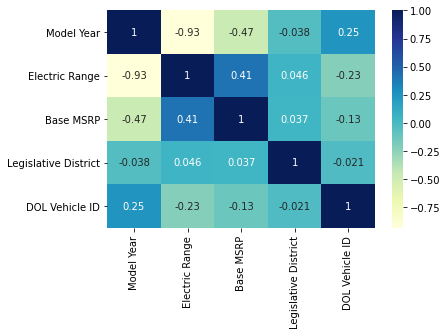

In [105]:
# plotting correlation heatmap 
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
  
# displaying heatmap 
plt.show() 

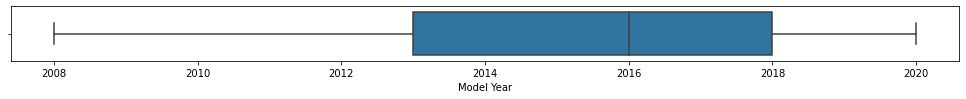

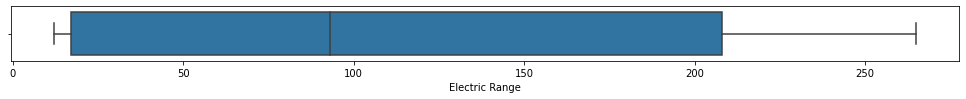

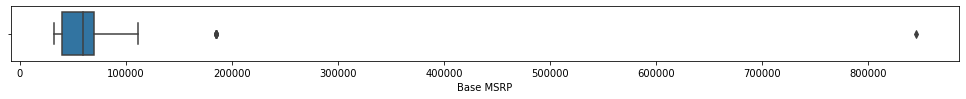

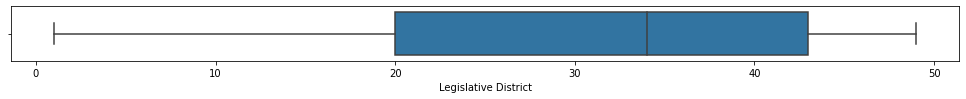

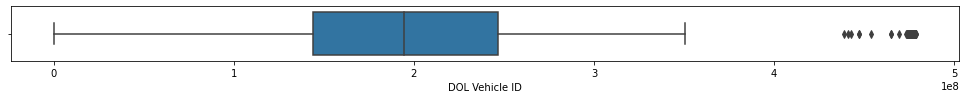

In [106]:
df1=df.select_dtypes(exclude=['object'])
for column in df1:
        plt.figure(figsize=(17,1))
        sns.boxplot(data=df1, x=column)

In [107]:
from sklearn.decomposition import PCA

In [108]:
pca = PCA(n_components=5)

In [109]:
df2=(df1 - df1.mean()) / df1.std()

In [110]:
df2.isna().any()

Model Year              False
Electric Range          False
Base MSRP               False
Legislative District    False
DOL Vehicle ID          False
dtype: bool

In [111]:
pca.fit(df2)

PCA(n_components=5)

In [112]:
pca.components_ 

array([[-0.61796004,  0.60485969,  0.42810511,  0.05386004, -0.25708997],
       [-0.04578182,  0.03743643,  0.00770517, -0.99821833,  0.00182686],
       [-0.1080272 ,  0.11161992,  0.25743153,  0.01287299,  0.95364271],
       [ 0.29069262, -0.37908457,  0.86434354, -0.02116231, -0.15574047],
       [-0.72101133, -0.69034712, -0.05749692,  0.00676069,  0.01455697]])